## Predict the percentage of a student based on the number of study hours using Linear Regresion

### Prerequisites required: 
- Python Libraries: Pandas, Numpy, Seaborn, Matplotlib
 - Scikit learn
- Machine Learning: Linear Regression 
- Data visualization

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Part1: Exploratory Data Analysis

### Importing the dataset 

In [5]:
url = "http://bit.ly/w-data"
student = pd.read_csv(url)
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Print the first and last 5 records

In [6]:
# first 5 records 
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# tail 5 records 
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Obtain the Summary of the dataset

In [8]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
student.index 

RangeIndex(start=0, stop=25, step=1)

In [10]:
student.dtypes 

Hours     float64
Scores      int64
dtype: object

# Part2: Data Visualization

### Using Scatter plot to indicate the relationship between 2 variables
- Hours: xlabel
- Scores: ylabel 

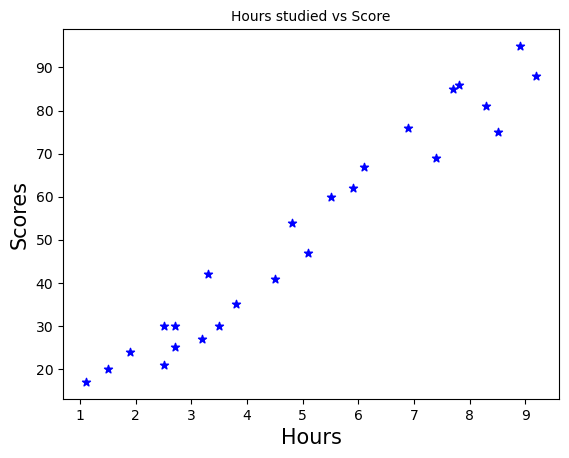

In [12]:
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(student.Hours,student.Scores,color='blue',marker='*')
plt.show()

### Scatter plot indicates a positive linear relationship between the variables
- The scores will increase as you increase the number of study hours

# Part3: Preparing the Data 

In [13]:
X = student.iloc[:, :-1].values 
X 

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
Y = student.iloc[:,1].values
Y 

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting the data into training and testing sets 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [18]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)


X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# Part4: Training the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression()

In [21]:
# Fitting the data 
linreg.fit(X_train, Y_train)

LinearRegression()

### Obtaining the coefficients of linear regression
- B0: Intercept of the line
- B1: Slope of the line 

In [22]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


### Plotting the regression line 

In [23]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

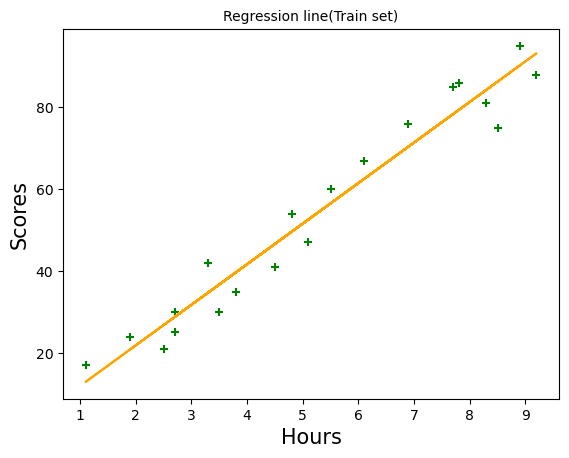

In [25]:
#plotting the training data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [27]:
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [28]:
Y_test 

array([20, 27, 69, 30, 62])

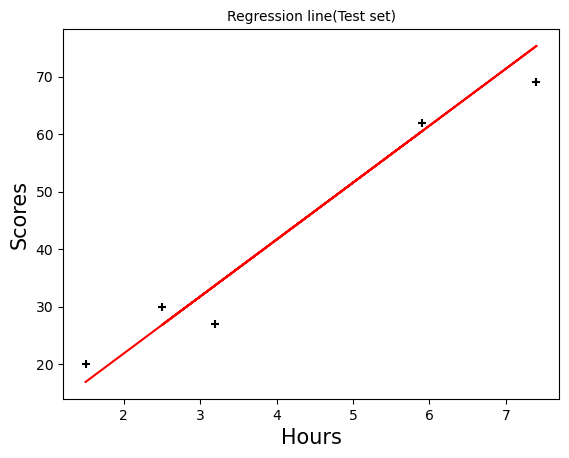

In [29]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

### Comparing actual vs predicted scores 

In [30]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy of the model

In [31]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105356

- The percentage obtained above indicates the model is a good fit to the data 

# Part5: Predicting the:
- Error 
- Score 

### Predicting the Error 

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


### Predicting the score 

In [34]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


# Conclusion: 
- The obtained result above indicates that if a student puts **9.25** study hours then student will get a score of **93.69**